In [25]:
#Importing data from csv
from pandas import read_csv
import pandas as pd

zerg_data = read_csv('../Output/ZergFeb.csv', header=0, index_col=False)
display(zerg_data)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,...,spawningpool,spinecrawler,spire,sporecrawler,swarmhost,ultralisk,ultraliskcavern,viper,zergling,win
0,0,Acropolis LE,us,551,Z,Z,0.0,1,0,Player 1 - soO (Zerg),...,0,0,0,0,0,0,0,0,0,1
1,0,Acropolis LE,us,551,Z,Z,532.0,480,30,Player 1 - soO (Zerg),...,0,0,0,0,0,0,0,0,0,1
2,0,Acropolis LE,us,551,Z,Z,420.0,960,60,Player 1 - soO (Zerg),...,0,0,0,0,0,0,0,0,0,1
3,0,Acropolis LE,us,551,Z,Z,352.8,1440,90,Player 1 - soO (Zerg),...,0,0,0,0,0,0,0,0,0,1
4,0,Acropolis LE,us,551,Z,Z,358.4,1920,120,Player 1 - soO (Zerg),...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81321,3455,Eternal Empire LE,eu,1610,Z,T,568.4,33600,2100,Player 1 - Reynor (Zerg),...,1,0,1,9,0,0,0,3,71,1
81322,3455,Eternal Empire LE,eu,1610,Z,T,590.8,34080,2130,Player 1 - Reynor (Zerg),...,1,0,1,9,0,0,0,3,68,1
81323,3455,Eternal Empire LE,eu,1610,Z,T,758.8,34560,2160,Player 1 - Reynor (Zerg),...,1,0,1,9,0,0,0,3,80,1
81324,3455,Eternal Empire LE,eu,1610,Z,T,476.0,35040,2190,Player 1 - Reynor (Zerg),...,1,0,1,9,0,0,0,2,79,1


In [26]:
#Standardization

from sklearn.preprocessing import StandardScaler

no_standardize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length','win']

#Names of Columns that we do want to Standardize
standardize_columns = [x for x in list(zerg_data) if x not in no_standardize]

#Standardizing these columns
stand = zerg_data[standardize_columns].values
stand_scaled = StandardScaler().fit_transform(stand)
zerg_data_standardized = pd.DataFrame(stand_scaled, columns=standardize_columns, index=zerg_data.index)

#One-hot Encoding the categorical variables
zerg_data_standardized = zerg_data_standardized.join(pd.get_dummies(zerg_data['map_name'], prefix='Map'))
zerg_data_standardized = zerg_data_standardized.join(pd.get_dummies(zerg_data['region'], prefix='Region'))
zerg_data_standardized = zerg_data_standardized.join(pd.get_dummies(zerg_data['enemy_race'], prefix='Enemy'))
zerg_data_standardized = zerg_data_standardized.join(zerg_data['win'])

#Displaying first and last 5 rows
display(zerg_data_standardized.head(5), zerg_data_standardized.tail(5))

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,...,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z,win
0,-2.008314,-1.356647,-1.221893,-1.230111,-0.472175,-2.052014,-1.571582,-1.165381,-0.916749,-0.507509,...,0,0,0,0,0,1,0,0,1,1
1,0.813810,-1.314249,-1.189833,-1.230111,-0.466463,-1.173250,-1.228843,-1.156463,-0.916749,-0.507509,...,0,0,0,0,0,1,0,0,1,1
2,0.219678,-1.271851,-1.157773,-1.121271,-0.255107,-1.075481,-1.343089,-1.129709,-0.916749,-0.507509,...,0,0,0,0,0,1,0,0,1,1
3,-0.136800,-1.187054,-1.125713,-1.121271,-0.426476,-1.042891,-0.543365,-1.111873,-0.916749,-0.507509,...,0,0,0,0,0,1,0,0,1,1
4,-0.107094,-1.187054,-1.125713,-1.121271,-0.420764,-0.977711,0.199236,-1.111873,-0.916749,-0.507509,...,0,0,0,0,0,1,0,0,1,1


,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,...,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z,win
81321,1.006902,1.017652,1.567328,1.354837,1.017600,1.270992,0.713344,1.527827,1.763291,5.371868,...,0,0,0,1,0,0,0,1,0,1
81322,1.125729,1.017652,1.591373,1.354837,1.194682,1.336172,0.027866,1.603629,1.957994,5.481252,...,0,0,0,1,0,0,0,1,0,1
81323,2.016926,1.017652,1.655493,1.354837,0.971901,1.140632,-0.429119,1.674972,2.187058,5.580051,...,0,0,0,1,0,0,0,1,0,1
81324,0.516744,0.975254,1.471148,1.354837,1.731640,1.042863,-0.886104,1.625924,2.129792,5.724720,...,0,0,0,1,0,0,0,1,0,1
81325,-2.008314,0.763263,1.791748,1.354837,1.314641,0.879913,-0.771858,1.804282,2.702450,5.760006,...,0,0,0,1,0,0,0,1,0,1


In [27]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(zerg_data_standardized) if x not in no_X]

Y = zerg_data_standardized['win']
X_standardized = zerg_data_standardized[yes_X]

In [28]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(zerg_data_standardized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)


Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]


X_standardized_train = X_standardized[0:num_train]
X_standardized_val = X_standardized[num_train:(num_train + num_val)]
X_standardized_test = X_standardized[(num_val + num_train):]

In [29]:
X_train = zerg_data_standardized[0:num_train]
X_val = zerg_data_standardized[num_train:(num_train + num_val)]
X_test = zerg_data_standardized[(num_val + num_train):]

In [30]:
Y_train.shape

(52048,)

In [31]:
X_train.shape

(52048, 116)

In [32]:
import numpy as np

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=X_train, val_df=X_val, test_df=X_test,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [33]:
w1 = WindowGenerator(input_width=15, label_width=15, shift=1,
                     label_columns=['win'])
w1

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']

In [34]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [35]:
import tensorflow as tf
tf.random.set_seed(1111)

# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(zerg_data_standardized[:w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (1, 16, 116)
Inputs shape: (1, 15, 116)
labels shape: (1, 15, 1)


In [36]:
import matplotlib.pyplot as plt

def plot(self, model=None, plot_col='win', max_subplots=1):
  inputs, labels = self.example
  plt.figure(figsize=(20,15))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [standardized]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time Step')

WindowGenerator.plot = plot

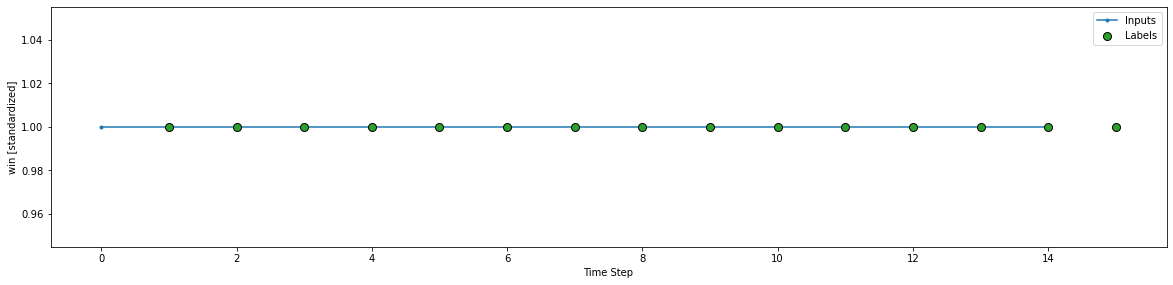

In [37]:
w1.example = example_inputs, example_labels
w1.plot()

In [38]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [39]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [40]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['win'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['win']

In [41]:
wide_window = WindowGenerator(
    input_width=15, label_width=15, shift=1,
    label_columns=['win'])

wide_window

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']

In [42]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=3):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                     callbacks=[early_stopping])
    return history

In [43]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [44]:
val_performance = {}
performance = {}

history_linear = compile_and_fit(linear, wide_window)

val_performance['Linear'] = linear.evaluate(wide_window.val)
performance['Linear'] = linear.evaluate(wide_window.test, verbose=0)

Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/100
1627/1627 [=====================

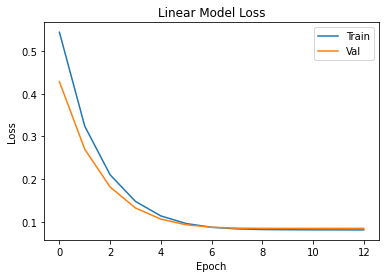

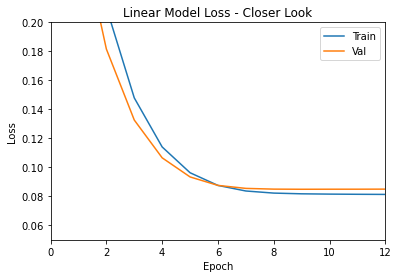

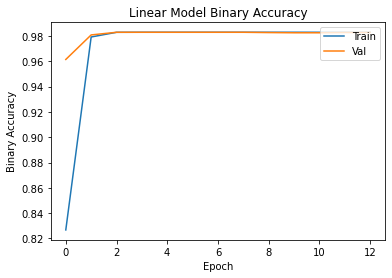

In [61]:
import matplotlib.pyplot as plt

#Linear Model Loss
plt.plot(history_linear.history['loss'])
plt.plot(history_linear.history['val_loss'])
plt.title('Linear Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

#Linear Model Loss
plt.plot(history_linear.history['loss'])
plt.plot(history_linear.history['val_loss'])
plt.title('Linear Model Loss - Closer Look')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(0.05,0.2)
plt.xlim(0,12)
plt.show()

#Linear Model Binary Accuracy
plt.plot(history_linear.history['binary_accuracy'])
plt.plot(history_linear.history['val_binary_accuracy'])
plt.title('Linear Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

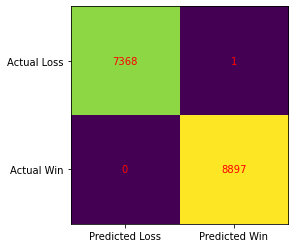

In [46]:
#Confusion matrix for Test set using Linear model 

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_test, linear.predict_classes(X_test))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

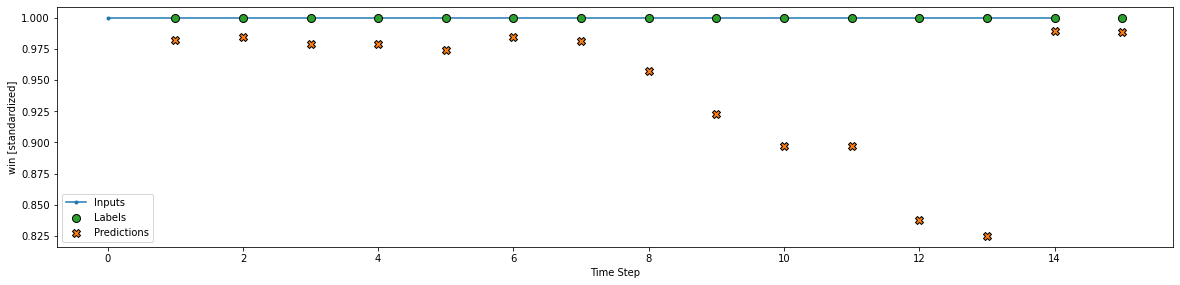

In [47]:
#Linear

wide_window.plot(linear)

In [48]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=131, activation='sigmoid'),
    tf.keras.layers.Dense(units=65, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

history_dense = compile_and_fit(dense, wide_window)

val_performance['Dense'] = dense.evaluate(wide_window.val)
performance['Dense'] = dense.evaluate(wide_window.test, verbose=0)

Epoch 1/100
1627/1627 [==============================] - 4s 3ms/step - loss: 0.1676 - binary_accuracy: 0.9441 - precision_3: 0.9436 - recall_3: 0.9464 - auc_3: 0.9845 - val_loss: 0.0642 - val_binary_accuracy: 0.9828 - val_precision_3: 0.9812 - val_recall_3: 0.9810 - val_auc_3: 0.9972
Epoch 2/100
1627/1627 [==============================] - 4s 2ms/step - loss: 0.0471 - binary_accuracy: 0.9830 - precision_3: 0.9832 - recall_3: 0.9832 - auc_3: 0.9981 - val_loss: 0.0498 - val_binary_accuracy: 0.9829 - val_precision_3: 0.9812 - val_recall_3: 0.9812 - val_auc_3: 0.9972
Epoch 3/100
1627/1627 [==============================] - 4s 2ms/step - loss: 0.0418 - binary_accuracy: 0.9831 - precision_3: 0.9835 - recall_3: 0.9831 - auc_3: 0.9982 - val_loss: 0.0504 - val_binary_accuracy: 0.9826 - val_precision_3: 0.9805 - val_recall_3: 0.9812 - val_auc_3: 0.9972
Epoch 4/100
1627/1627 [==============================] - 4s 2ms/step - loss: 0.0397 - binary_accuracy: 0.9833 - precision_3: 0.9846 - recall_3: 0

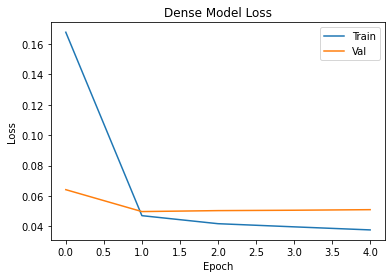

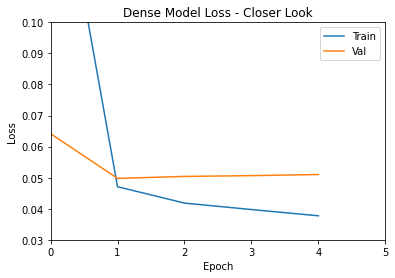

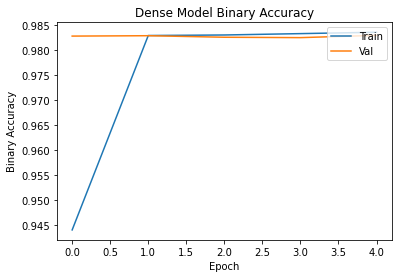

In [62]:
#Dense Model Loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Dense Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

#Dense Model Loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Dense Model Loss - Closer Look')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(0.03,0.1)
plt.xlim(0,5)
plt.show()

#Dense Model Binary Accuracy
plt.plot(history_dense.history['binary_accuracy'])
plt.plot(history_dense.history['val_binary_accuracy'])
plt.title('Dense Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

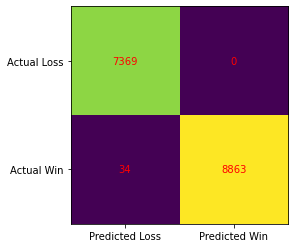

In [50]:
#Confusion matrix for Test set using Dense NN

cm = confusion_matrix(Y_test, dense.predict_classes(X_test))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Loss', 'Predicted Win'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Loss', 'Actual Win'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

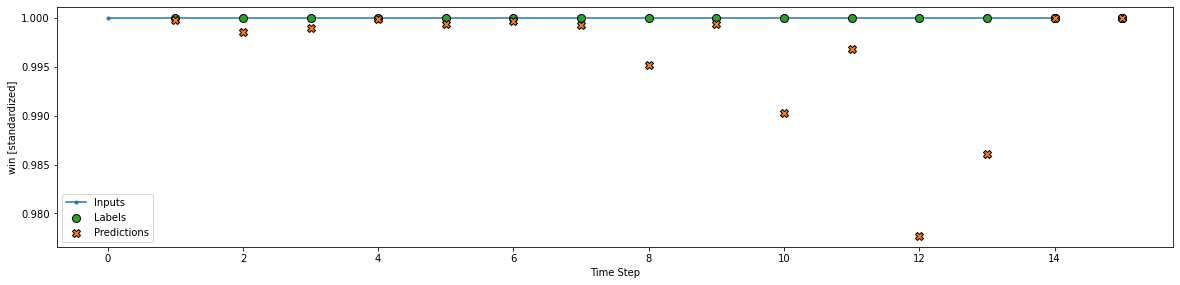

In [51]:
#Dense

wide_window.plot(dense)

In [52]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [53]:
history_lstm = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/100
1627/1627 [==============================] - 9s 5ms/step - loss: 0.1228 - binary_accuracy: 0.9639 - precision_4: 0.9609 - recall_4: 0.9683 - auc_4: 0.9921 - val_loss: 0.0592 - val_binary_accuracy: 0.9813 - val_precision_4: 0.9782 - val_recall_4: 0.9808 - val_auc_4: 0.9970
Epoch 2/100
1627/1627 [==============================] - 8s 5ms/step - loss: 0.0390 - binary_accuracy: 0.9857 - precision_4: 0.9868 - recall_4: 0.9851 - auc_4: 0.9987 - val_loss: 0.0555 - val_binary_accuracy: 0.9800 - val_precision_4: 0.9785 - val_recall_4: 0.9775 - val_auc_4: 0.9971
Epoch 3/100
1627/1627 [==============================] - 8s 5ms/step - loss: 0.0286 - binary_accuracy: 0.9893 - precision_4: 0.9900 - recall_4: 0.9889 - auc_4: 0.9993 - val_loss: 0.0605 - val_binary_accuracy: 0.9786 - val_precision_4: 0.9770 - val_recall_4: 0.9759 - val_auc_4: 0.9966
Epoch 4/100
1627/1627 [==============================] - 8s 5ms/step - loss: 0.0210 - binary_accuracy: 0.9925 - precision_4: 0.9929 - recall_4: 0

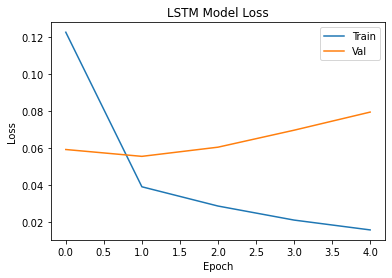

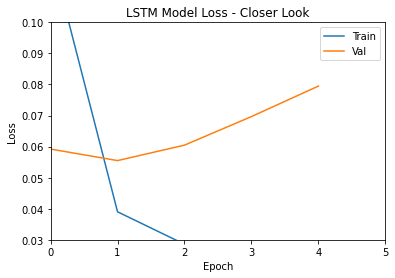

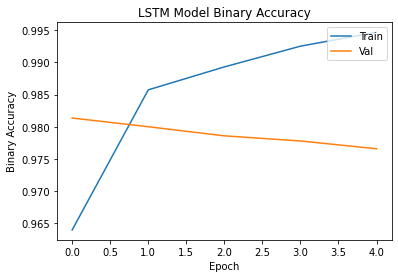

In [63]:
#LSTM Model Loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

#LSTM Model Loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss - Closer Look')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(0.03,0.1)
plt.xlim(0,5)
plt.show()

#LSTM Model Binary Accuracy
plt.plot(history_lstm.history['binary_accuracy'])
plt.plot(history_lstm.history['val_binary_accuracy'])
plt.title('LSTM Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

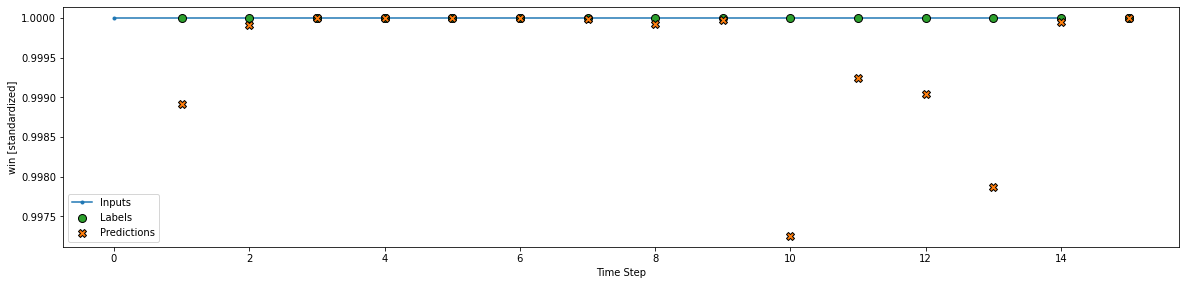

In [55]:
#LSTM

wide_window.plot(lstm_model)

In [56]:
gru_model = tf.keras.models.Sequential([
    tf.keras.layers.GRU(32, return_sequences=True),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [57]:
history_gru = compile_and_fit(gru_model, wide_window)

val_performance['GRU'] = gru_model.evaluate(wide_window.val)
performance['GRU'] = gru_model.evaluate(wide_window.test, verbose=0)

Epoch 1/100
1627/1627 [==============================] - 9s 6ms/step - loss: 0.1105 - binary_accuracy: 0.9678 - precision_5: 0.9641 - recall_5: 0.9729 - auc_5: 0.9932 - val_loss: 0.0570 - val_binary_accuracy: 0.9814 - val_precision_5: 0.9798 - val_recall_5: 0.9792 - val_auc_5: 0.9971
Epoch 2/100
1627/1627 [==============================] - 7s 4ms/step - loss: 0.0398 - binary_accuracy: 0.9850 - precision_5: 0.9860 - recall_5: 0.9845 - auc_5: 0.9986 - val_loss: 0.0551 - val_binary_accuracy: 0.9802 - val_precision_5: 0.9787 - val_recall_5: 0.9777 - val_auc_5: 0.9971
Epoch 3/100
1627/1627 [==============================] - 7s 4ms/step - loss: 0.0316 - binary_accuracy: 0.9879 - precision_5: 0.9887 - recall_5: 0.9875 - auc_5: 0.9991 - val_loss: 0.0605 - val_binary_accuracy: 0.9782 - val_precision_5: 0.9784 - val_recall_5: 0.9736 - val_auc_5: 0.9966
Epoch 4/100
1627/1627 [==============================] - 7s 4ms/step - loss: 0.0259 - binary_accuracy: 0.9906 - precision_5: 0.9911 - recall_5: 0

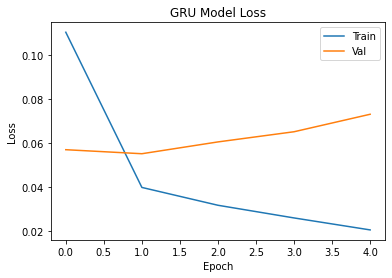

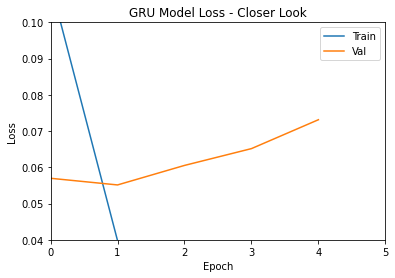

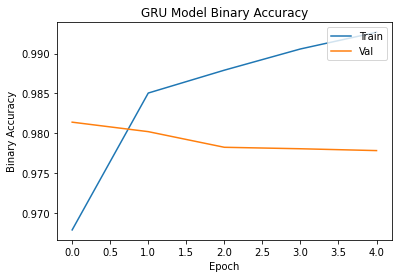

In [65]:
#GRU Model Loss
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

#GRU Model Loss
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU Model Loss - Closer Look')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.ylim(0.04,0.1)
plt.xlim(0,5)
plt.show()

#GRU Model Binary Accuracy
plt.plot(history_gru.history['binary_accuracy'])
plt.plot(history_gru.history['val_binary_accuracy'])
plt.title('GRU Model Binary Accuracy')
plt.ylabel('Binary Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

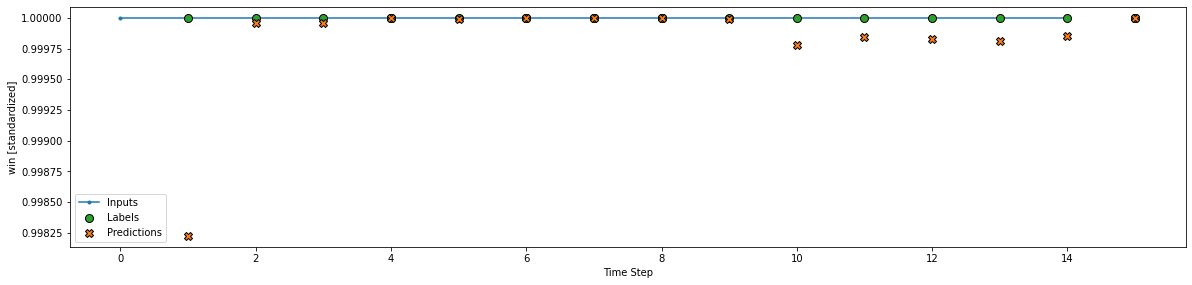

In [59]:
#GRU

wide_window.plot(gru_model)

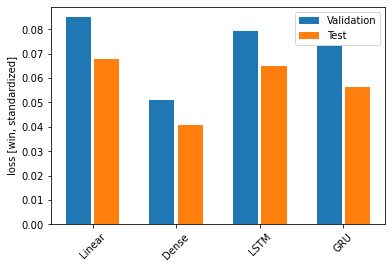

In [60]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'loss'
metric_index = lstm_model.metrics_names.index('loss')
val_loss = [v[metric_index] for v in val_performance.values()]
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('loss [win, standardized]')
plt.bar(x - 0.17, val_loss, width, label='Validation')
plt.bar(x + 0.17, test_loss, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()